In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
S0 initial susceptibles
I01 initial infecteds for infection 1
I02 initial infecteds for infection 2
R01 initial recovereds for infection 1
R02 initial recovereds for infection 2
V0 initial vaccinateds
VE vaccine effectiveness
VR vaccine rate
cr cross-immunity rate
pC or beta contact rate
gamma1 recovery rate for infection 1
gamma2 recovery rate for infection 2
t_max max time
stepsize time step
nu birth rate
mu death rate
lambda1 force of infection for infection 1
lambda2 force of infection for infection 2
'''


def SIR_cross_immunity(S0,I01,I02,R01,R02,V0,VE,VR,cr, beta1, beta2, gamma1, gamma2, birthrate, deathrate, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I1 = np.zeros(len(T))
    I2 = np.zeros(len(T))
    R1 = np.zeros(len(T))
    R2 = np.zeros(len(T))
    V = np.zeros(len(T))
    N = S0 + I01 + I02 + R01 + R02 + V0

    mu = deathrate
    nu = birthrate

    for idx,t in enumerate(T):
        if idx==0:
            # starting values for susceptibles, infected with I1, infected with I2, recovered from R1,
            # recovered from R2, vaccinated against I1
            S[idx] = S0
            I1[idx] = I01
            I2[idx] = I02
            R1[idx] = R01
            R2[idx] = R02
            V[idx] = V0
            N = S[idx] + I1[idx] + I2[idx] + R1[idx] + R2[idx] + V[idx]
        else:
            # transmission rates for each infection
            lambda1 = beta1 * I1[idx-1] / N
            lambda2 = beta2 * I2[idx-1] / N

            # deltas
            dS_dt = -lambda1 * S[idx-1] - lambda2 * S[idx-1] - VE * (VR * S[idx-1]) + nu * N - mu * S[idx - 1]
            dI1_dt = lambda1 * S[idx-1] + (lambda1 * (1 - VE)) * V[idx-1] - gamma1 * I1[idx-1] - mu * I1[idx - 1]
            dI2_dt = lambda2 * S[idx-1] + (1 - cr) * (lambda2 * V[idx-1]) - gamma2 * I2[idx-1] - mu * I2[idx - 1]
            dR1_dt = gamma1 * I1[idx-1] - mu * R1[idx - 1]
            dR2_dt = gamma2 * I2[idx-1] - mu * R2[idx - 1]

            # IMPORTANT: for vaccinated  people, we add to V at the rate of vaccination (VR) times the number of
            # susceptibles left. Then we vaccinate against I1, subtracting from vaccinated population at lambda1 * (1-VE)
            # where VE represents vaccine efficacy. We subtract from vaccinated population at normal I2 infection rate
            # but multiplied by cr (immune imprinting rate) to get cross immunity value
            dV_dt = VE * VR * S[idx-1] - (lambda1 * (1 - VE)) * V[idx-1] - (1 - cr) * (lambda2 * V[idx-1]) - mu * V[idx - 1]


            S[idx] = S[idx-1] + dS_dt * stepsize
            I1[idx] = I1[idx-1] + dI1_dt * stepsize
            I2[idx] = I2[idx-1] + dI2_dt * stepsize
            R1[idx] = R1[idx-1] + dR1_dt * stepsize
            R2[idx] = R2[idx-1] + dR2_dt * stepsize
            V[idx] = V[idx-1] + dV_dt * stepsize

    return S, I1, I2, R1, R2, V, T

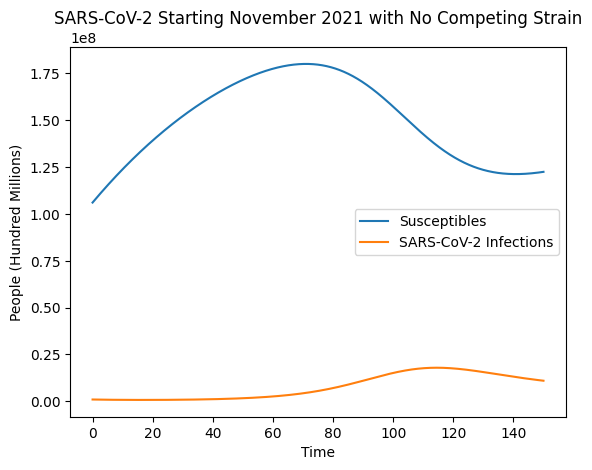

In [ ]:
S, I1, I2, R1, R2, V, T = SIR_cross_immunity(106000000, 1000000, 0, 80000000, 0, 140000000, 0.95, 0.004, 0.25, 0.375, 0.9, 0.15, 0.19, 0.011, 0.011, 150, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, label='Susceptibles')
ax.plot(T, I1, label='SARS-CoV-2 Infections')
plt.title('SARS-CoV-2 Starting November 2021 with No Competing Strain')
plt.xlabel('Time')
plt.ylabel('People (Hundred Millions)')
ax.legend()

105362863.92906886
40.7


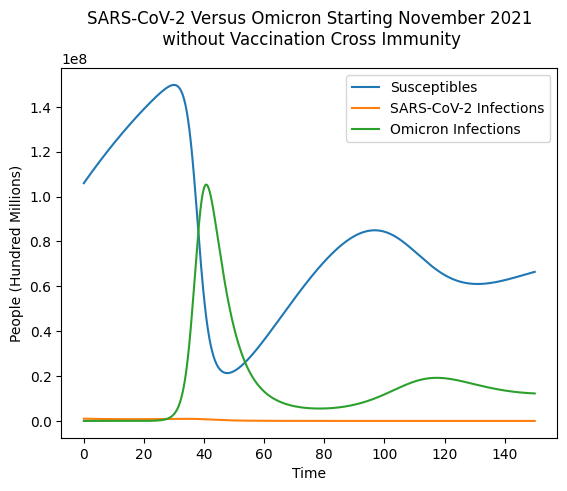

In [ ]:
S, I1, I2, R1, R2, V, T = SIR_cross_immunity(106000000, 1000000, 1, 80000000, 0, 140000000, 0.95, 0.004, 0, 0.375, 0.9, 0.15, 0.19, 0.011, 0.011, 150, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, label='Susceptibles')
ax.plot(T, I1, label='SARS-CoV-2 Infections')
ax.plot(T, I2, label='Omicron Infections')
plt.title('SARS-CoV-2 Versus Omicron Starting November 2021\n without Vaccination Cross Immunity')
plt.xlabel('Time')
plt.ylabel('People (Hundred Millions)')
ax.legend()
print(max(I2))
print(T[np.argmax(I2)])

45350436.82307021
84.60000000000001


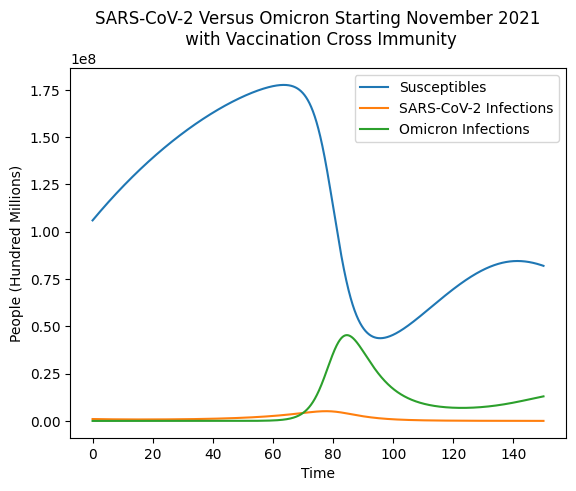

In [ ]:
S, I1, I2, R1, R2, V, T = SIR_cross_immunity(106000000, 1000000, 1, 80000000, 0, 140000000, 0.95, 0.004, 0.75, 0.375, 0.9, 0.15, 0.19, 0.011, 0.011, 150, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, label='Susceptibles')
ax.plot(T, I1, label='SARS-CoV-2 Infections')
ax.plot(T, I2, label='Omicron Infections')
plt.title('SARS-CoV-2 Versus Omicron Starting November 2021\n with Vaccination Cross Immunity')
plt.xlabel('Time')
plt.ylabel('People (Hundred Millions)')
ax.legend()
plt.show
print(max(I2))
print(T[np.argmax(I2)])

33368208.12696244
144.6


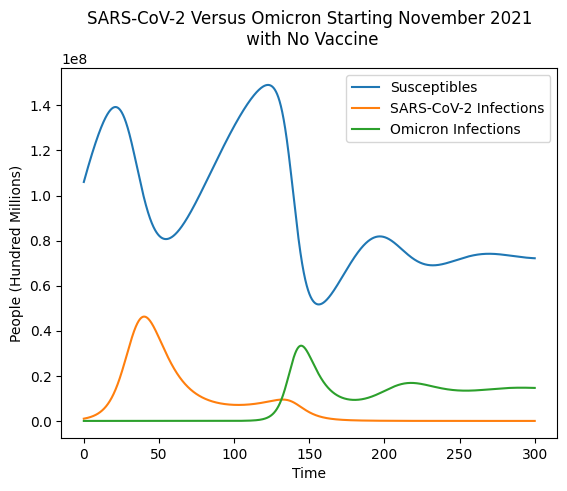

In [ ]:
S, I1, I2, R1, R2, V, T = SIR_cross_immunity(106000000, 1000000, 1, 80000000, 0, 140000000, 0, 0.004, 1, 0.375, 0.9, 0.15, 0.19, 0.011, 0.010, 300, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, label='Susceptibles')
ax.plot(T, I1, label='SARS-CoV-2 Infections')
ax.plot(T, I2, label='Omicron Infections')
plt.title('SARS-CoV-2 Versus Omicron Starting November 2021\n with No Vaccine')
plt.xlabel('Time')
plt.ylabel('People (Hundred Millions)')
ax.legend()
plt.show
print(max(I2))
print(T[np.argmax(I2)])